In [1]:
import os
DATASET_PATH = "FOD Runway Dataset.v2i.yolov8"
print(os.listdir(DATASET_PATH))

['data.yaml', 'README.dataset.txt', 'README.roboflow.txt', 'test', 'train', 'valid']


In [2]:
import yaml
with open(os.path.join(DATASET_PATH, "data.yaml"), "r") as f:
    data = yaml.safe_load(f)

data

{'train': '../train/images',
 'val': '../valid/images',
 'test': '../test/images',
 'nc': 1,
 'names': ['FOD'],
 'roboflow': {'workspace': 'jimtesting',
  'project': 'fod-runway-dataset',
  'version': 2,
  'license': 'CC BY 4.0',
  'url': 'https://universe.roboflow.com/jimtesting/fod-runway-dataset/dataset/2'}}

In [3]:
CLASS_NAMES = data["names"]
CLASS_NAMES

['FOD']

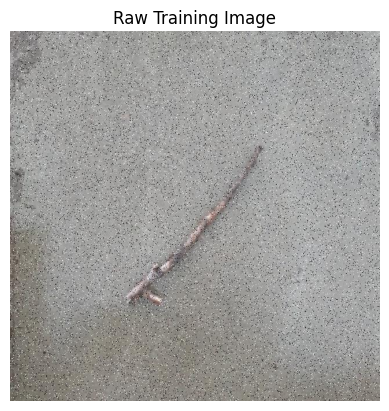

'frame_000140_PNG.rf.78c164ec1c8507a18b4748268a9089b3.jpg'

In [6]:
import cv2
import random
import matplotlib.pyplot as plt

image_dir = os.path.join(DATASET_PATH, "train", "images")
image_files = os.listdir(image_dir)

image_name = random.choice(image_files)
image_path = os.path.join(image_dir, image_name)

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.title("Raw Training Image")
plt.show()

image_name

In [7]:
label_path = os.path.join(DATASET_PATH, "train", "labels", image_name.replace(".jpg", ".txt"))

with open(label_path, "r") as f:
    labels = f.readlines()

labels

['0 0.49609375 0.5234375 0.3828125 0.4421875']

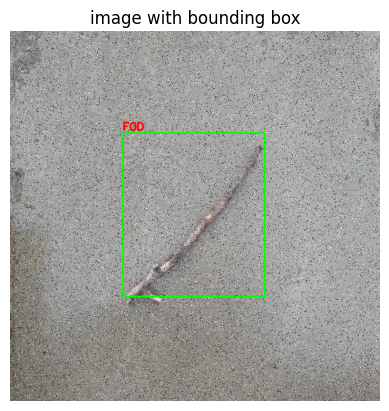

In [8]:
h, w, _ = img.shape

for line in labels:
    class_id, x, y, bw, bh = map(float, line.split())

    x1 = int((x - bw/2) * w)
    y1 = int((x - bh/2) * h)
    x2 = int((x + bw/2) * w)
    y2 = int((x + bh/2) * h)

    label = CLASS_NAMES[int(class_id)]

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

plt.imshow(img)
plt.axis("off")
plt.title("image with bounding box")
plt.show()